# Lab 1

**Goal**: The goal of this lab will be to get a Jupyter notebook running, build/visualize/measure some basic networks using XGI/NetworkX, and compute some basic statistics!

**Before we get started**:
1. Make a BIOL4559homework repository on GitHub. Add Abhay Gupta (@AbhayGupta115) as a collaborator in the Settings tab on GitHub.
2. In GitHub Desktop, make a branch titled `comp-activity-1`.
3. Put this notebook in the repository.
4. Create a conda environment titled `biol4559` by running `conda create -n biol4559 python=3.13`
5. Activate your conda environment by running `conda activate biol4559`
6. Download the requirements file from Canvas (in the `labs` folder under `Files`) and place it in the repository.
7. Install the list of requirements by running `pip install -r requirements.txt`
8. Make your environment visible to Jupyter Notebook by running `python -m ipykernel install --user --name biol4559 --display-name "Python (BIOL4559)"` in the command line.

**After the completion of this lab**
1. List the people with whom you worked on this lab.
2. Make a pull request and title it "Grade Computational Activity 1".
3. Assign @AbhayGupta115 as a reviewer.
4. Submit the pull request.

**How you will be graded**

This activity is out of 10 points. You will be graded on two things: completion, clear documentation, and correctness of your process.

* *Completion (4pts)*: This is solely whether you attempted and completed all portions of the computational assignment.
* *Documentation (4pts)*: Write comments above your code, describing what it does to demonstrate that you understand what the code is doing. ** Examples of good and bad documentation below.
* *Correctness (2pts)*: Does your code run and produce the correct output?

**Documentation examples**

Good example:
```python
# import necessary packages
import networkx as nx

# create an empty network
G = nx.Graph()

# add nodes 1, 2, and 3 to the network from a list.
G.add_nodes_from([1, 2, 3])

# add edges to the network from a list of the edges
G.add_edges_from([[1, 2], [2, 3]])

# Visualize the network
nx.draw(G)
```

Bad example:
```python
# Build and draw a network
import networkx as nx
G = nx.Graph()
G.add_nodes_from([1, 2, 3])
G.add_edges_from([[1, 2], [2, 3]])
nx.draw(G)
```

## NetworkX

Let's start by learning how to work with NetworkX! NetworkX is probably the most popular package for working with networks.

We import networkx:

In [1]:
import networkx as nx


We start by creating an empty network ( or *graph*):

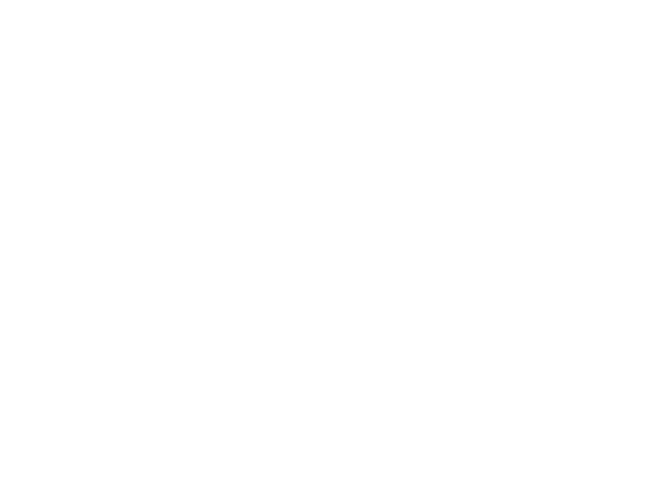

In [2]:
G = nx.Graph()
nx.draw(G)

Let's suppose that we want to add nodes and edges to this network. G is what is known as an *object* and we use the "." operator to access methods that work on graph objects. (I like to think of *objects* as nouns, and *methods* or *functions* as verbs)

We can use the `add_node` and `add_edge` methods to add nodes and edges to this network:

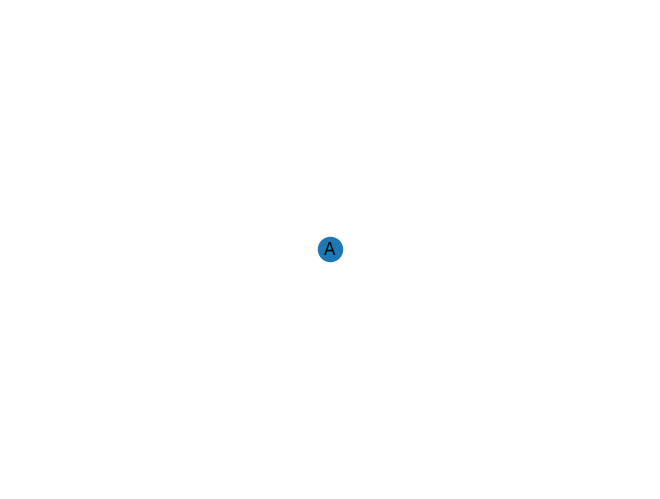

In [3]:
G.add_node("A")
nx.draw(G, with_labels=True)

We can also add multiple nodes and edges at a time!

In [4]:
G.add_nodes_from(["B", "C"])
G.add_edges_from([("A", "C"), ("B", "C")])


Let's visualize this network:

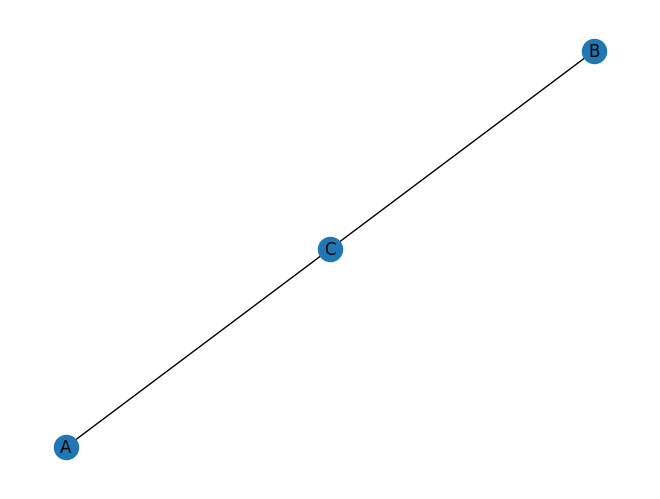

In [5]:
nx.draw(G, with_labels=True)


We can look at the NetworkX [documentation](https://networkx.org/documentation/stable/) to find other methods.

But before we get started, let's talk about `list` and `dict`.

What is a list? It is an array of numbers (For example, `l = [1, 2, 3]`), and you can (1) access entries inside by their *index* (For example, `l[0] = 1`) and (2) you can add entries to the end of a list with the `append` method (For example, after running `l.append(4)`, we get `l = [1, 2, 3, 4]`).

What is a dict? It is a combination of *key*, *value* pairs (For example, `d = {"node1": 1, "node2": 3, "node3": 7}`), and you can (1) access entries inside by their *key* (For example, `d["node1"] = 1`) and (2) you can add entries to the dictionary with an "=" (For example, after running `d["node4"] = 2`, we get `d = {"node1": 1, "node2": 3, "node3": 7, "node4": 4}`)

Lastly, what if you want to iterate over a list of things? The `for` loop is your friend! We can iterate over entries in a list:
```python
l = [1, 3, 4]
for i in l:
    print(i)
```
(which will print out `1, 3, 4`) or we can iterate over a pre-specified range:
```python

for i in range(4):
    print(i)
```
(which will print out `0, 1, 2, 3`).

**Graded activity**

Search the documentation and implement the following:

* Load the Zachary Karate Club network. How many nodes and edges does it have?
* Check whether the network is connected or not.
* Get the degree of each node. Who has the highest degree (and what is their degree)? Who has the lowest degree (and what is their degree)?
* Get the mean degree.
* Visualize the network. (*Ungraded:* If you want to be fancy, play around with node layouts!)

**Student short answer here**

Node Degree
   0     16
   1      9
   2     10
   3      6
   4      3
   5      4
   6      4
   7      4
   8      5
   9      2
  10      3
  11      1
  12      2
  13      5
  14      2
  15      2
  16      2
  17      2
  18      2
  19      3
  20      2
  21      2
  22      2
  23      5
  24      3
  25      3
  26      2
  27      4
  28      3
  29      4
  30      4
  31      6
  32     12
  33     17


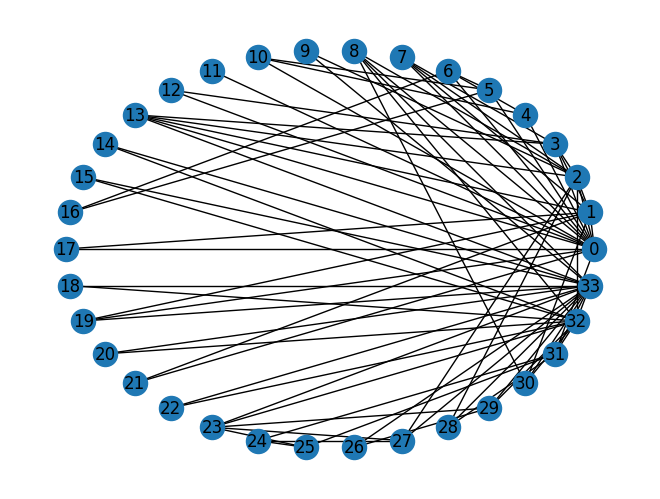

In [6]:
# https://networkx.org/documentation/stable/auto_examples/graph/plot_karate_club.html

import matplotlib.pyplot as plt
import networkx as nx

G = nx.karate_club_graph()
print("Node Degree")

min_degree = float("inf")
for v in G:
    print(f"{v:4} {G.degree(v):6}")
    min_degree = min(G.degree(v), min_degree)


nx.draw_circular(G, with_labels=True)
plt.show()

In [7]:
min_degree

# Looking at the graph, we can see 11 has the lowest degree

1

In [8]:
degrees = [d for n, d in G.degree()]
mean_degree = sum(degrees) / G.number_of_nodes()
print(mean_degree)


4.588235294117647


## XGI

Okay, that's NetworkX. What about XGI? XGI stands for Comple**X** **G**roup **I**nteractions and can not only handle networks (or graphs), but also *hypergraphs* which are composed of group interactions. We won't get into the details quite yet, but for now, all you need to know is this: you can also build/represent/visualize networks with XGI.

We start by importing XGI:

In [9]:
import xgi
print(xgi.__version__)

0.10


XGI has much of the same syntax for adding nodes and edges. See below:

In [10]:
x = xgi.Hypergraph()
x.add_node("a")
x.add_node("b")

print(x)

Unnamed Hypergraph with 2 nodes and 0 hyperedges


And adding multiple nodes/edges...

In [11]:
H = xgi.Hypergraph([[1,2,3], [2,3,4,5], [3,6]])
print(H)
print(H.num_nodes, H.num_edges)

Unnamed Hypergraph with 6 nodes and 3 hyperedges
6 3


Now let's draw what we have!

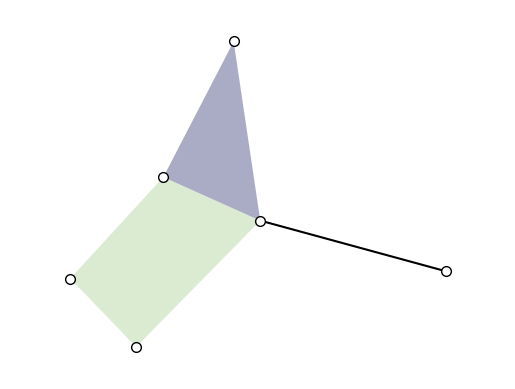

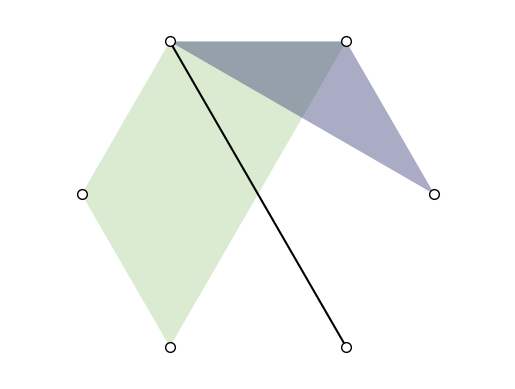

In [12]:
# Basic draw
xgi.draw(H)
plt.show()


# fancier layoyt
pos = xgi.layout.circular_layout(H)
xgi.draw(H, pos=pos)
plt.show()



XGI can color/size nodes by their statistics. Here I'm accessing the nodes of the network and getting their degree:

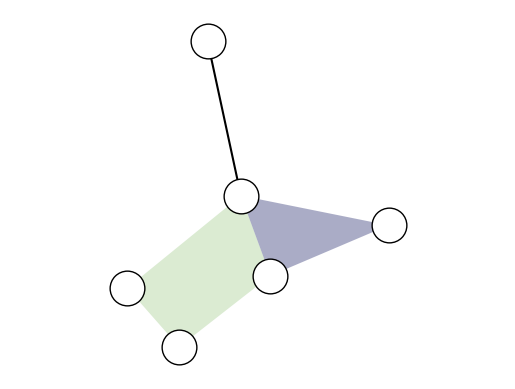

In [13]:
xgi.draw(H, node_color='skyblue', edge_color='red', node_size=25)
plt.show()


Everything that you need is on the XGI [website](https://xgi.readthedocs.io) for tutorials, documentation, and examples.

**Graded activity**

* Load the Zachary's Karate Club dataset in NetworkX and convert to a xgi.Hypergraph. Hint: you'll need to use `G.edges` and convert it to a list.
* Compute the clustering coefficient of each node. Who has the highest clustering coefficient (and what is it)? Who has the lowest clustering coefficient (and what is it)?
* What is the density of the network?
* Visualize the network with the nodes sized by their clustering coefficient.

**Student short response here**

In [14]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.karate_club_graph()


Z = xgi.Hypergraph()

# add edges
Z.add_nodes_from(G.nodes())


# add edges as hyperedges 
for u, v in G.edges():
    Z.add_edge([u, v]) 

In [15]:
print(Z.nodes)  # list of nodes
print(Z.edges)  # list of hyperedges


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]


In [16]:
## Alternate way

Z_fast = xgi.Hypergraph([list(edge) for edge in G.edges()])


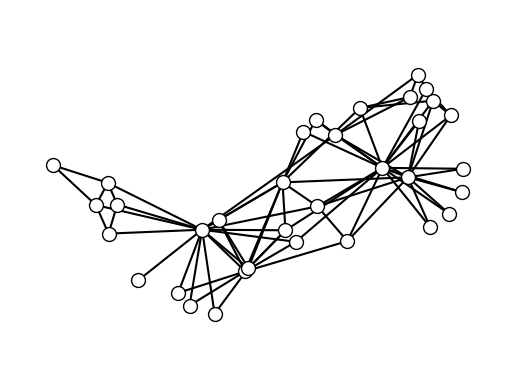

In [17]:
xgi.draw(Z_fast, node_color='skyblue', edge_color='red', node_size=10)
plt.show()


Fun (**ungraded**) challenge problem:

Go to the [Budapest Reference Connectome 3.0](https://pitgroup.org/connectome/) and download the edge list. Import the data as a pandas (or polars) dataframe and use the first two columns as an edge list to import into NetworkX. Visualize this network. What are some features of this network that you notice?